In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from xgboost import plot_importance


%matplotlib inline

# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/CL15_fix.csv")
df

,Unnamed: 0,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,...,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,0,KR_6419756778,1,23844,4504,38,9.50,338,80,22447,...,1,0,0,0,0,0,0,0,0,0
1,0,KR_6415275424,1,23999,5204,37,9.25,306,82,32867,...,0,0,1,0,0,0,0,0,0,0
2,0,KR_6423763038,1,19896,1756,36,9.00,344,83,23703,...,0,0,0,0,0,0,0,0,0,1
3,0,KR_6416730851,0,19214,3964,35,8.75,292,72,19422,...,0,0,0,0,0,0,0,0,0,1
4,0,KR_6421561510,0,23906,3216,37,9.25,353,52,24677,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0,KR_6424983956,1,26894,2969,40,10.00,373,102,26216,...,0,0,0,1,1,0,0,0,0,0
1517,0,KR_6421600762,0,22672,4792,36,9.00,309,67,26064,...,0,0,0,1,0,0,0,0,1,0
1518,0,KR_6421531877,1,26975,3510,37,9.25,312,60,34028,...,0,0,1,0,0,0,0,0,0,1
1519,0,KR_6419297103,1,25905,3477,39,9.75,365,95,27497,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
drop_df[""]

In [27]:
# 필요없는 칼럼 drop
drop_df = df.drop(['Unnamed: 0', 'gameId','redWins',
                   "blueFirstTowerLane",'blueDragonType','redFirstTowerLane','redDragonType'], axis=1)
drop_df

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,...,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,1,23844,4504,38,9.50,338,80,22447,1,13,...,1,0,0,0,0,0,0,0,0,0
1,1,23999,5204,37,9.25,306,82,32867,0,18,...,0,0,1,0,0,0,0,0,0,0
2,1,19896,1756,36,9.00,344,83,23703,1,6,...,0,0,0,0,0,0,0,0,0,1
3,0,19214,3964,35,8.75,292,72,19422,1,5,...,0,0,0,0,0,0,0,0,0,1
4,0,23906,3216,37,9.25,353,52,24677,1,19,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,26894,2969,40,10.00,373,102,26216,1,14,...,0,0,0,1,1,0,0,0,0,0
1517,0,22672,4792,36,9.00,309,67,26064,1,16,...,0,0,0,1,0,0,0,0,1,0
1518,1,26975,3510,37,9.25,312,60,34028,1,21,...,0,0,1,0,0,0,0,0,0,1
1519,1,25905,3477,39,9.75,365,95,27497,1,17,...,0,0,1,0,0,0,0,0,0,0


In [28]:
# dragon count 
drop_df["blueDragonCount"] = drop_df.filter(regex='(?=(.*blue.*))(?=(.*DRAGON.*)).*').sum(axis=1)
drop_df["redDragonCount"] = drop_df.filter(regex='(?=(.*red.*))(?=(.*DRAGON.*)).*').sum(axis=1)


# *DRAGON drop
drop_df = drop_df[drop_df.columns.drop(list(drop_df.filter(regex="(.*_DRAGON.*)")))]


<Axes: >

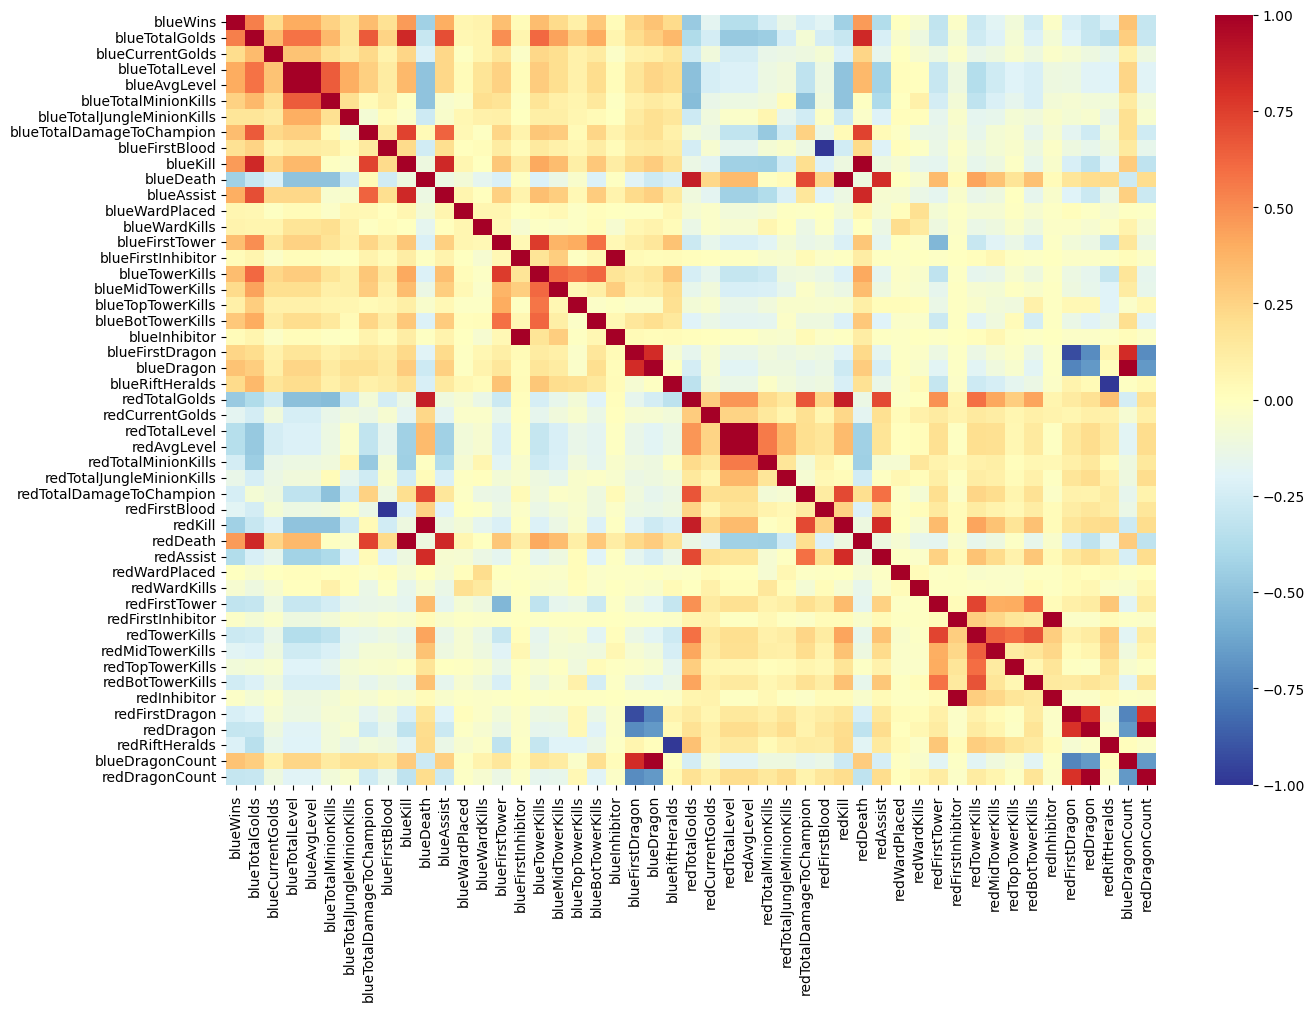

In [31]:
corr_df = drop_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_df, 
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [42]:
# 승패 여부와 상관관계 top 10 변수들
np.abs(corr_df["blueWins"][1:]).sort_values(ascending=False).head(10)

blueTotalGolds    0.540687
redTotalGolds     0.461527
blueKill          0.457916
redDeath          0.457916
blueDeath         0.429863
redKill           0.429863
blueAvgLevel      0.405035
blueTotalLevel    0.405035
blueAssist        0.393619
redAssist         0.368299
Name: blueWins, dtype: float64

# 모델링

In [43]:
drop_df = df.drop(['Unnamed: 0', 'gameId','redWins',
                   "blueFirstTowerLane",'blueDragonType','redFirstTowerLane','redDragonType'], axis=1)
drop_df

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,...,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,1,23844,4504,38,9.50,338,80,22447,1,13,...,1,0,0,0,0,0,0,0,0,0
1,1,23999,5204,37,9.25,306,82,32867,0,18,...,0,0,1,0,0,0,0,0,0,0
2,1,19896,1756,36,9.00,344,83,23703,1,6,...,0,0,0,0,0,0,0,0,0,1
3,0,19214,3964,35,8.75,292,72,19422,1,5,...,0,0,0,0,0,0,0,0,0,1
4,0,23906,3216,37,9.25,353,52,24677,1,19,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,26894,2969,40,10.00,373,102,26216,1,14,...,0,0,0,1,1,0,0,0,0,0
1517,0,22672,4792,36,9.00,309,67,26064,1,16,...,0,0,0,1,0,0,0,0,1,0
1518,1,26975,3510,37,9.25,312,60,34028,1,21,...,0,0,1,0,0,0,0,0,0,1
1519,1,25905,3477,39,9.75,365,95,27497,1,17,...,0,0,1,0,0,0,0,0,0,0


In [44]:
drop_df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
def train_test(df):
  y_train = df['blueWins']
  x_train = df.drop(['blueWins'], axis=1)
  return x_train, y_train

In [ ]:
x_train, y_train = train_test(drop_df)

val_size=0.3

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = val_size, random_state=42)

## Xgboost

파라미터 튜닝

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators, gamma
            ,min_child_weight, subsample
            ,colsample_bytree, silent=True, nthread=-1):

    # 모델 정의
    model = xgb.XGBClassifier(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                            gamma=gamma,
                            min_child_weight=min_child_weight,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree, 
                            nthread=nthread
                            )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    y_pred= model.predict(x_valid)

    return f1_score(y_valid, y_pred)

In [ ]:
pbounds = {'max_depth': (3, 7),
                'learning_rate': (0.01, 0.3),
                'n_estimators': (20,100),
                'gamma': (0, 100),
                'min_child_weight': (0, 3),
                'subsample': (0.5, 1),
                'colsample_bytree' :(0.2, 1)
                }

bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    

bo.maximize(init_points=2, n_iter=100)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.7225    | 0.5336    | 72.03     | 0.01003   | 4.209     | 0.4403    | 27.39     | 0.5931    |
| 2         | 0.7468    | 0.4764    | 39.68     | 0.1663    | 4.677     | 2.056     | 36.36     | 0.9391    |
| 3         | 0.7551    | 0.2046    | 40.19     | 0.1041    | 3.836     | 2.294     | 37.26     | 0.6836    |
| 4         | 0.7481    | 0.2       | 41.77     | 0.01      | 3.0       | 2.998     | 40.07     | 0.5       |
| 5         | 0.7448    | 0.2       | 43.23     | 0.01      | 3.0       | 1.597     | 36.4      | 0.5       |
| 6         | 0.7385    | 0.3712    | 38.03     | 0.1126    | 4.302     | 2.299     | 40.08     | 0.9235    |
| 7         | 0.7387    | 0.3511    | 41.07     | 0.1154    | 4.467     | 0.9557    | 37.76     | 0.8101    |
| 8       

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def bo_params_rf(max_samples,n_estimators,max_features, max_depth):
    
    params = {
        'max_samples': max_samples,
        'max_features':max_features,
        'max_depth':int(max_depth),
        'n_estimators':int(n_estimators)
    }
    clf = RandomForestClassifier(**params)
    
    clf.fit(x_train, y_train)

    # 예측값 출력
    y_pred= clf.predict(x_valid)

    return f1_score(y_valid, y_pred)

In [ ]:
pbounds = {'max_samples':(0.5,1),
        'max_features':(0.5,1),
        'max_depth' : (3, 7),
        'n_estimators':(10,200)}

rf_bo = BayesianOptimization(bo_params_rf, pbounds=pbounds, verbose=2, random_state=1)
rf_bo.maximize(init_points=2, n_iter=100)

|   iter    |  target   | max_depth | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7475    | 4.668     | 0.8602    | 0.5001    | 67.44     |
| 2         | 0.755     | 3.587     | 0.5462    | 0.5931    | 75.66     |
| 3         | 0.7638    | 3.883     | 0.6515    | 0.6017    | 75.83     |
| 4         | 0.75      | 4.77      | 0.7067    | 0.7739    | 151.4     |
| 5         | 0.7424    | 3.533     | 0.7239    | 0.6746    | 75.63     |
| 6         | 0.745     | 3.085     | 0.9039    | 0.9824    | 143.4     |
| 7         | 0.75      | 4.458     | 0.5112    | 0.5762    | 194.6     |
| 8         | 0.7411    | 6.981     | 0.6626    | 0.9084    | 18.48     |
| 9         | 0.7711    | 6.925     | 0.6352    | 0.9044    | 94.85     |
| 10        | 0.75      | 4.3       | 0.8179    | 0.7003    | 152.8     |
| 11        | 0.7463    | 4.224     | 0.8383    | 0.7757    | 70.01     |
| 12        | 0.7443    | 4.589     | 

In [ ]:
print(bo.max)
print(rf_bo.max)

{'target': 0.7785888077858881, 'params': {'colsample_bytree': 0.876464730178701, 'gamma': 7.587794469827935, 'learning_rate': 0.22862677896710762, 'max_depth': 6.113063199728092, 'min_child_weight': 1.6568969602845902, 'n_estimators': 59.82330784750002, 'subsample': 0.5613135497695099}}
{'target': 0.7719298245614035, 'params': {'max_depth': 6.906809004469841, 'max_features': 0.7694420889345979, 'max_samples': 0.9922124621995168, 'n_estimators': 160.45910499773902}}


# 다른 데이터에 적용

In [ ]:
cl_10 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/CL10_fix.csv")
cl_15 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/CL15_fix.csv")
gm_10 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/GM10_fix.csv")
gm_15 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/GM15_fix.csv")

In [ ]:
drop_cl10 = cl_10.drop(['Unnamed: 0', 'gameId','redWins',
                   "blueFirstTowerLane",'blueDragonType','redFirstTowerLane','redDragonType'], axis=1)
drop_cl15 = cl_15.drop(['Unnamed: 0', 'gameId','redWins',
                   "blueFirstTowerLane",'blueDragonType','redFirstTowerLane','redDragonType'], axis=1)


## Cl_10

In [ ]:
x_train, y_train = train_test(drop_cl10)

val_size=0.3

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = val_size, random_state=42)

Xgboost

In [ ]:
params = {'colsample_bytree': 0.876464730178701, 'gamma': 7.587794469827935, 'learning_rate': 0.22862677896710762, 'max_depth': 6, 
          'min_child_weight': 1.6568969602845902, 'n_estimators': 60, 'subsample': 0.5613135497695099}

model = xgb.XGBClassifier(**params)
model.fit(x_train, y_train)
valid_pred = model.predict(x_valid)
print("F1 score: %.2f%%" % (f1_score(y_valid, valid_pred) * 100.0))
print("Accuracy: %.2f%%" % (accuracy_score(y_valid, valid_pred) * 100.0))

F1 score: 68.09%
Accuracy: 70.46%


Rf

In [ ]:
params = {'max_depth': 6.906809004469841, 'max_features': 0.7694420889345979, 
          'max_samples': 0.9922124621995168, 'n_estimators': 161}
clf = RandomForestClassifier(**params)
model.fit(x_train, y_train)
valid_pred = model.predict(x_valid)
print("F1 sore: %.2f%%" % (f1_score(y_valid, valid_pred) * 100.0))
print("Accuracy: %.2f%%" % (accuracy_score(y_valid, valid_pred) * 100.0))

F1 sore: 68.09%
Accuracy: 70.46%
